# Plot SSH DA products and compare to NATL60 SSH

## Software version 

In [1]:
import sys
print (sys.version)

3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:56) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


## Library importation

In [2]:
%matplotlib inline
import sys,os,shutil
import numpy as np
import matplotlib.pylab as plt
import time
import netCDF4 as nc 
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

## Loading Ensforecast

In [3]:
init_date=datetime(2012,10,1,1)
present_date=init_date
final_date=datetime(2012,11,1,0)
deltat=timedelta(days=1)*24
ntime=int( (final_date-present_date).days*24+(final_date-present_date).seconds/3600+1 )
nens=1

In [4]:
# Ensforecast SSH
name_assim_time_step='hourly'
# First time step
itime=0
year1=str(present_date.year)
month1=str(present_date.month).zfill(2)
day1=str(present_date.day).zfill(2)
hour1=str(present_date.hour).zfill(2)
name_exp='QGSWOSMO_IniNATL60_'+name_assim_time_step+'EnsForecast_'+str(nens).zfill(2)+'ens'
file_deg='/mnt/meom/workdir/metrefs/Boost-SWOT/2018/DATA/DA_OSMOSIS/'+name_exp+'/'+name_exp+'_y'+year1+'m'+month1+'d'+day1+'h'+hour1+'_SSHdegrad.nc'
fid_deg = nc.Dataset(file_deg)
lon2d=np.array(fid_deg.variables["nav_lon"][:,:]) 
lat2d=np.array(fid_deg.variables["nav_lat"][:,:])  
SSH_Ensforecast_init=np.array(fid_deg.variables["degraded_sossheig"][:,:,:]) 
SSH_Ensforecast=np.zeros([ntime,np.shape(SSH_Ensforecast_init)[0],np.shape(SSH_Ensforecast_init)[1],np.shape(SSH_Ensforecast_init)[2]],)
SSH_Ensforecast[itime,:,:,:]=SSH_Ensforecast_init
present_date=present_date+deltat
itime=itime+1  
 
# Time loop
while present_date<=final_date: 
    # OSMOSIS: SSH from NATL60, daily outputs, degradated grid (3x3)
    year1=str(present_date.year)
    month1=str(present_date.month).zfill(2)
    day1=str(present_date.day).zfill(2)
    hour1=str(present_date.hour).zfill(2)
    file_deg='/mnt/meom/workdir/metrefs/Boost-SWOT/2018/DATA/DA_OSMOSIS/'+name_exp+'/'+name_exp+'_y'+year1+'m'+month1+'d'+day1+'h'+hour1+'_SSHdegrad.nc'
    fid_deg = nc.Dataset(file_deg)
    lon2d=np.array(fid_deg.variables["nav_lon"][:,:]) 
    lat2d=np.array(fid_deg.variables["nav_lat"][:,:])  
    SSH_Ensforecast[itime,:,:,:]=np.array(fid_deg.variables["degraded_sossheig"][:,:,:]) 
    present_date=present_date+deltat
    itime=itime+1  

## Loading SSH DA products

In [5]:
#init_date=datetime(2012,10,1,1)
present_date=init_date
#final_date=datetime(2013,9,30,23)
deltat=timedelta(days=1)/24
ntime=int( (final_date-present_date).days*24+(final_date-present_date).seconds/3600+1 )  

In [19]:
# Da product SSH
nameDAprod='Replacement'
name_assim_time_step='hourly'
# First time step
itime=0
year1=str(present_date.year)
month1=str(present_date.month).zfill(2)
day1=str(present_date.day).zfill(2)
hour1=str(present_date.hour).zfill(2)
name_exp='QGSWOSMO_IniNATL60_'+name_assim_time_step+nameDAprod+'_'+str(nens).zfill(2)+'ens'
file_deg='/mnt/meom/workdir/metrefs/Boost-SWOT/2018/DATA/DA_OSMOSIS/'+name_exp+'/'+name_exp+'_y'+year1+'m'+month1+'d'+day1+'h'+hour1+'_SSHdegrad.nc'
fid_deg = nc.Dataset(file_deg)
lon2d=np.array(fid_deg.variables["nav_lon"][:,:]) 
lat2d=np.array(fid_deg.variables["nav_lat"][:,:])  
SSH_DAprod_init=np.array(fid_deg.variables["degraded_sossheig"][:,:,:]) 
SSH_DAprod=np.zeros([ntime,np.shape(SSH_DAprod_init)[0],np.shape(SSH_DAprod_init)[1],np.shape(SSH_DAprod_init)[2]],)
SSH_DAprod[itime,:,:,:]=SSH_DAprod_init
present_date=present_date+deltat
itime=itime+1  

# Time loop
while present_date<=final_date:   
    year1=str(present_date.year)
    month1=str(present_date.month).zfill(2)
    day1=str(present_date.day).zfill(2)
    hour1=str(present_date.hour).zfill(2)
    file_deg='/mnt/meom/workdir/metrefs/Boost-SWOT/2018/DATA/DA_OSMOSIS/'+name_exp+'/'+name_exp+'_y'+year1+'m'+month1+'d'+day1+'h'+hour1+'_SSHdegrad.nc'
    fid_deg = nc.Dataset(file_deg)
    lon2d=np.array(fid_deg.variables["nav_lon"][:,:]) 
    lat2d=np.array(fid_deg.variables["nav_lat"][:,:])  
    SSH_DAprod[itime,:,:,:]=np.array(fid_deg.variables["degraded_sossheig"][:,:,:]) 
    present_date=present_date+deltat
    itime=itime+1      
print(np.shape(SSH_DAprod))

FileNotFoundError: [Errno 2] No such file or directory: b'/mnt/meom/workdir/metrefs/Boost-SWOT/2018/DATA/DA_OSMOSIS/QGSWOSMO_IniNATL60_hourlyDirectInsertion_01ens/QGSWOSMO_IniNATL60_hourlyDirectInsertion_01ens_y2012m11d01h01_SSHdegrad.nc'

## Plotting three time steps of ensemble mean SSH

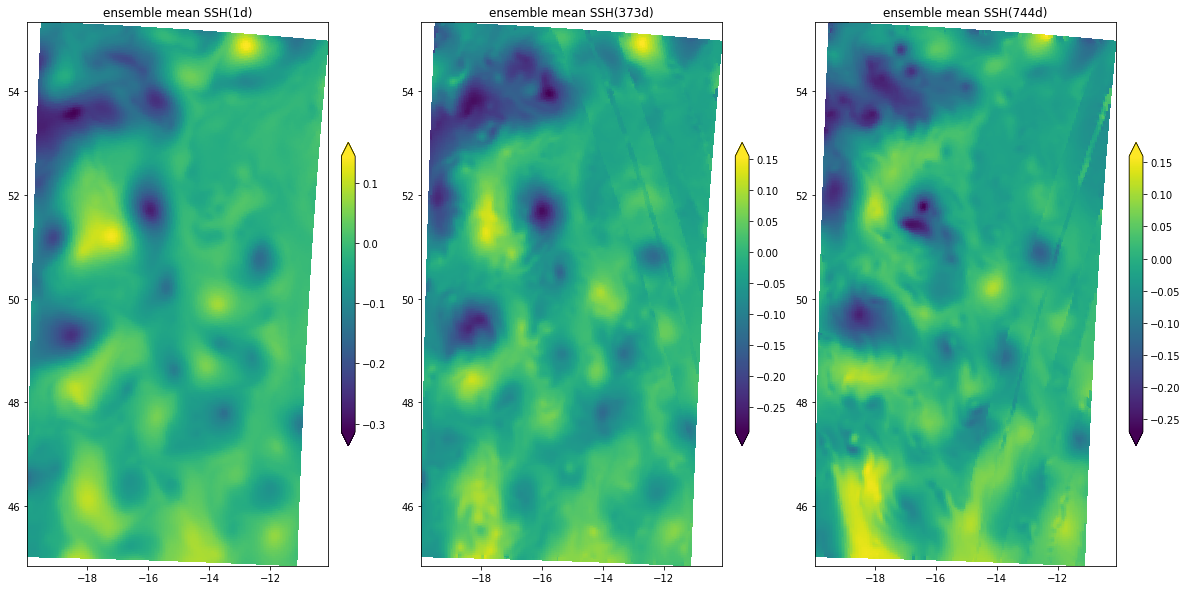

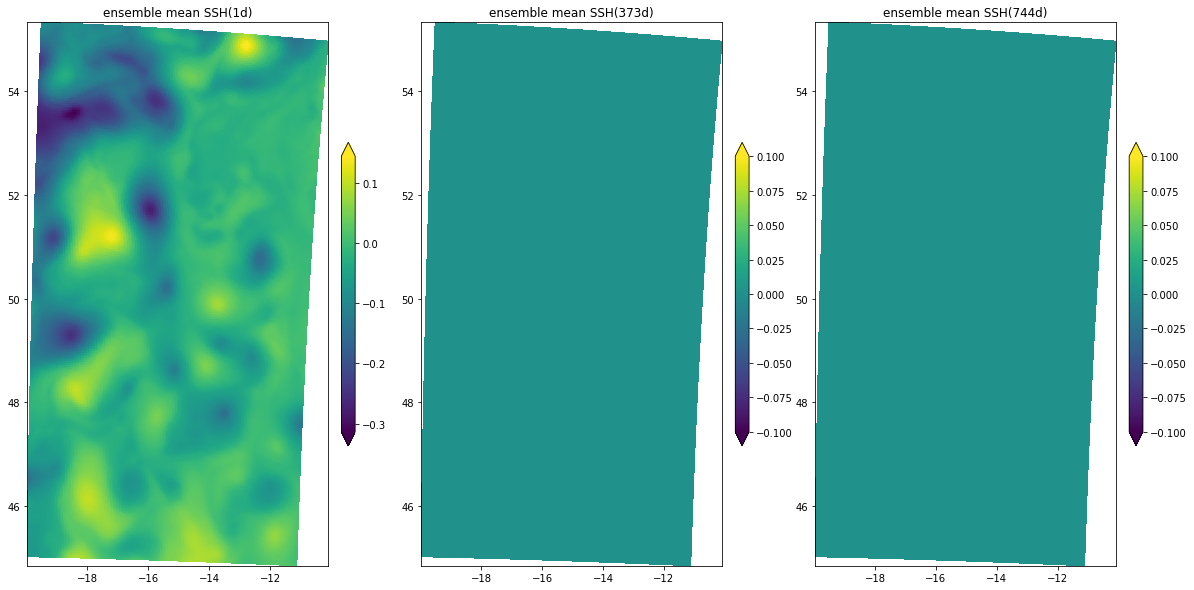

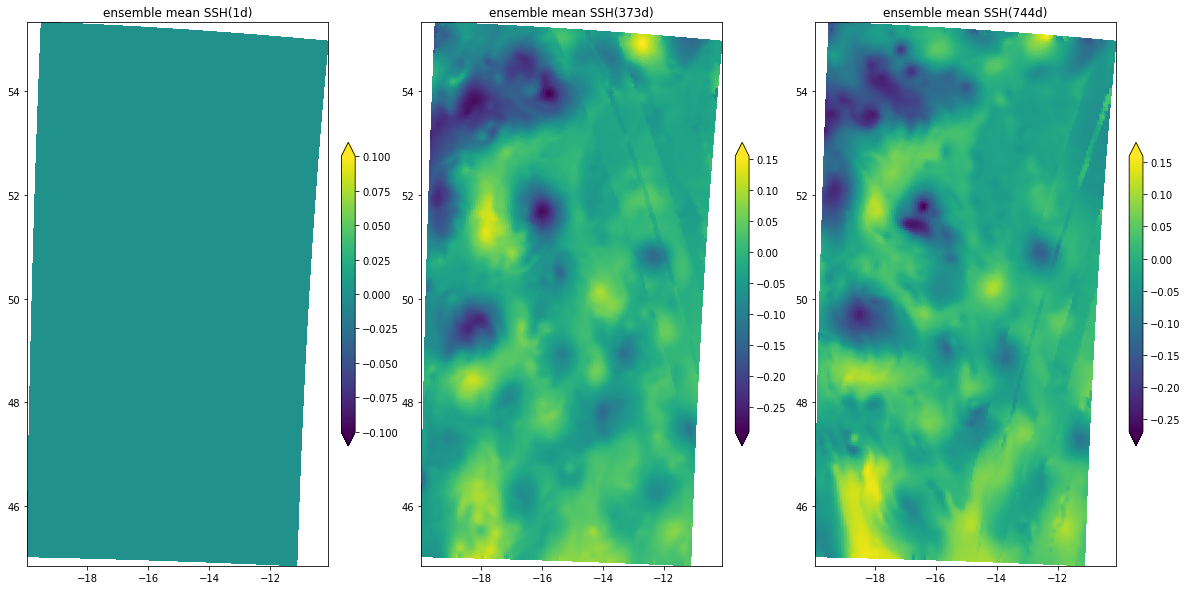

In [7]:
timet0=0
timet1=int(ntime/2) 
timet2=ntime-1


plt.figure(figsize=(20, 10))

meanSSH_DAprod=np.mean(SSH_DAprod[:,:,:,:],1) 

plt.subplot(131)
plt.pcolormesh(lon2d,lat2d,meanSSH_DAprod[timet0,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('ensemble mean SSH(%sd)'%(timet0+1));

plt.subplot(132)
plt.pcolormesh(lon2d,lat2d,meanSSH_DAprod[timet1,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('ensemble mean SSH(%sd)'%(timet1+1));

plt.subplot(133)
plt.pcolormesh(lon2d,lat2d,meanSSH_DAprod[timet2,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('ensemble mean SSH(%sd)'%(timet2+1));


plt.figure(figsize=(20, 10))

meanSSH_Ensforecast=np.mean(SSH_Ensforecast[:,:,:,:],1) 

plt.subplot(131)
plt.pcolormesh(lon2d,lat2d,meanSSH_Ensforecast[timet0,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('ensemble mean SSH(%sd)'%(timet0+1));

plt.subplot(132)
plt.pcolormesh(lon2d,lat2d,meanSSH_Ensforecast[timet1,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('ensemble mean SSH(%sd)'%(timet1+1));

plt.subplot(133)
plt.pcolormesh(lon2d,lat2d,meanSSH_Ensforecast[timet2,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('ensemble mean SSH(%sd)'%(timet2+1));


plt.figure(figsize=(20, 10))


plt.subplot(131)
plt.pcolormesh(lon2d,lat2d,meanSSH_DAprod[timet0,:,:]-meanSSH_Ensforecast[timet0,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('ensemble mean SSH(%sd)'%(timet0+1));

plt.subplot(132)
plt.pcolormesh(lon2d,lat2d,meanSSH_DAprod[timet1,:,:]-meanSSH_Ensforecast[timet1,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('ensemble mean SSH(%sd)'%(timet1+1));

plt.subplot(133)
plt.pcolormesh(lon2d,lat2d,meanSSH_DAprod[timet2,:,:]-meanSSH_Ensforecast[timet2,:,:])
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('ensemble mean SSH(%sd)'%(timet2+1)); 
 

## Loading NATL60 SSH 

In [8]:
init_date1=datetime(2012,10,1,0)
#diff_time=(init_date-init_file_date)  
#ntime_file=int( diff_time.days*24 + diff_time.seconds/3600 )  
#SSHindex=range(ntime_file,ntime_file+ntime)   
deltatmonth=relativedelta(months=1)
present_date1=init_date1 
final_date1=final_date

ntime=(final_date1-present_date1).days*24

# Warning: Script made for 1h outputs !!!
# OSMOSIS: SSH from NATL60, daily outputs, degradated grid (3x3)

file_deg='/mnt/meom/MODEL_SET/NATL60/NATL60-CJM165-S/1h/OSMOSIS/NATL60OSMO-CJM165_y2012m10.1h_SSHdegrad.nc'
fid_deg = nc.Dataset(file_deg)
lon2d=np.array(fid_deg.variables["nav_lon"][:,:]) 
lat2d=np.array(fid_deg.variables["nav_lat"][:,:])  
SSH_NATL60_degrad1=np.zeros([ntime,np.shape(lon2d)[0],np.shape(lat2d)[1]],)
itime=0 
while present_date1 < final_date1:
    SSHindex=np.arange(((present_date1+deltatmonth)-present_date1).days*24)   
    year1=str(present_date1.year)
    month1=str(present_date1.month).zfill(2)
    day1=str(present_date1.day).zfill(2)

    file_deg='/mnt/meom/MODEL_SET/NATL60/NATL60-CJM165-S/1h/OSMOSIS/NATL60OSMO-CJM165_y'+year1+'m'+month1+'.1h_SSHdegrad.nc'
    fid_deg = nc.Dataset(file_deg)
    lon2d=np.array(fid_deg.variables["nav_lon"][:,:]) 
    lat2d=np.array(fid_deg.variables["nav_lat"][:,:])    
    SSH_NATL60_degrad1[itime:itime+SSHindex[-1]+1,:,:]=np.array(fid_deg.variables["degraded_sossheig"][SSHindex,:,:]) 
    print(file_deg)
    present_date1=present_date1+deltatmonth 
    itime=itime+SSHindex[-1]+1     
    

/mnt/meom/MODEL_SET/NATL60/NATL60-CJM165-S/1h/OSMOSIS/NATL60OSMO-CJM165_y2012m10.1h_SSHdegrad.nc


In [9]:
# Removing first time step: 2012/10/01 00h since forecast starts at 2012/10/01 01h  
SSH_NATL60_degrad=SSH_NATL60_degrad1[1:,:,:]
SSH_Ensforecast=SSH_Ensforecast[:-1,:,:] 
ntime=ntime-1

In [10]:

print(np.shape(SSH_NATL60_degrad))
print(np.shape(SSH_Ensforecast))

(743, 301, 175)
(743, 1, 301, 175)


## Plotting point-to-point differences (DA outputs-NATL60)

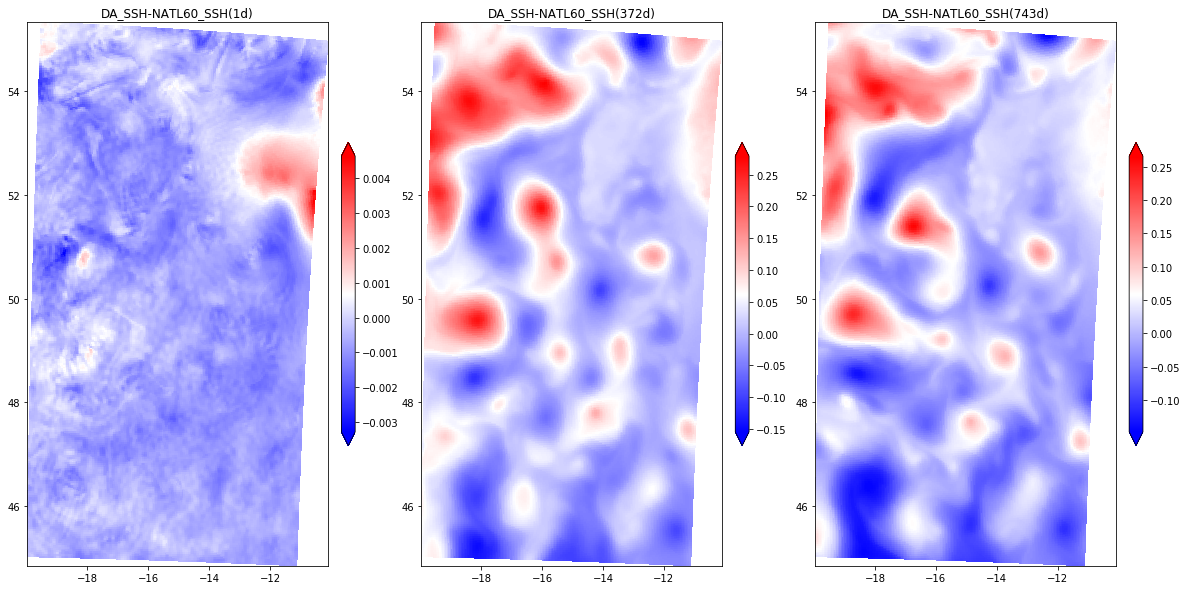

In [11]:
if False:
    plt.figure(figsize=(20, 10))

    plt.subplot(131)
    plt.pcolormesh(lon2d,lat2d,np.mean(SSH_DAprod[timet0,:,:,:],0)-SSH_NATL60_degrad[timet0,:,:],cmap=plt.cm.get_cmap('bwr'))
    plt.colorbar(extend='both', fraction=0.042, pad=0.04)
    plt.title('DA_SSH-NATL60_SSH(%sd)'%(timet0+1));

    plt.subplot(132)
    plt.pcolormesh(lon2d,lat2d,np.mean(SSH_DAprod[timet1,:,:,:],0)-SSH_NATL60_degrad[timet1,:,:],cmap=plt.cm.get_cmap('bwr'))
    plt.colorbar(extend='both', fraction=0.042, pad=0.04)
    plt.title('DA_SSH-NATL60_SSH(%sd)'%(timet1+1));

    plt.subplot(133)
    plt.pcolormesh(lon2d,lat2d,np.mean(SSH_DAprod[timet2,:,:,:],0)-SSH_NATL60_degrad[timet2,:,:],cmap=plt.cm.get_cmap('bwr'))
    plt.colorbar(extend='both', fraction=0.042, pad=0.04)
    plt.title('DA_SSH-NATL60_SSH(%sd)'%(timet2+1));
timet0=0
timet1=int(ntime/2) 
timet2=ntime-1

plt.figure(figsize=(20, 10))

plt.subplot(131)
plt.pcolormesh(lon2d,lat2d,np.mean(SSH_Ensforecast[timet0,:,:,:],0)-SSH_NATL60_degrad[timet0,:,:],cmap=plt.cm.get_cmap('bwr'))
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('DA_SSH-NATL60_SSH(%sd)'%(timet0+1));

plt.subplot(132)
plt.pcolormesh(lon2d,lat2d,np.mean(SSH_Ensforecast[timet1,:,:,:],0)-SSH_NATL60_degrad[timet1,:,:],cmap=plt.cm.get_cmap('bwr'))
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('DA_SSH-NATL60_SSH(%sd)'%(timet1+1));

plt.subplot(133)
plt.pcolormesh(lon2d,lat2d,np.mean(SSH_Ensforecast[timet2,:,:,:],0)-SSH_NATL60_degrad[timet2,:,:],cmap=plt.cm.get_cmap('bwr'))
plt.colorbar(extend='both', fraction=0.042, pad=0.04)
plt.title('DA_SSH-NATL60_SSH(%sd)'%(timet2+1));

## Plotting RMSE

In [12]:
ntime=ntime-1
RMSE_DA=np.zeros(ntime,) 
RMSE_Free=np.zeros(ntime,)
 

nlon=np.shape(SSH_NATL60_degrad)[1]
nlat=np.shape(SSH_NATL60_degrad)[2]
for itime in range(ntime): 
    RMSE_DA[itime]=np.sqrt(np.sum(np.sum(np.square(np.mean(SSH_DAprod[itime,:,:,:],0)-SSH_NATL60_degrad[itime,:,:]))))/nlon/nlat
    RMSE_Free[itime]=np.sqrt(np.sum(np.sum(np.square(np.mean(SSH_Ensforecast[itime,:,:,:],0)-SSH_NATL60_degrad[itime,:,:]))))/nlon/nlat
    
    

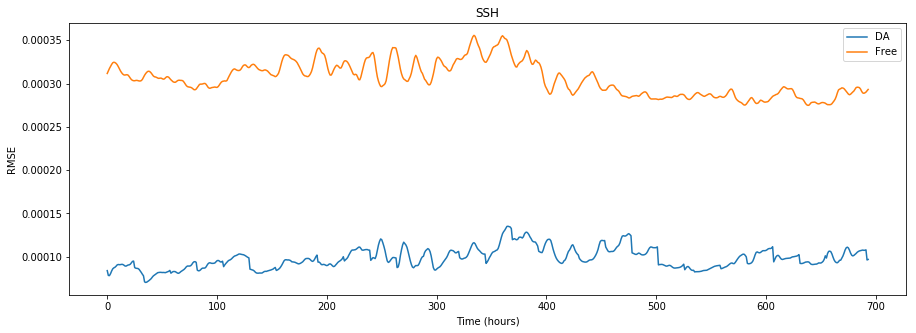

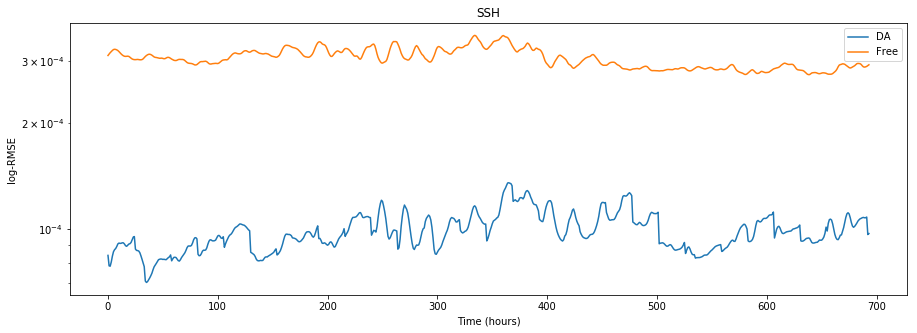

In [18]:
spinup=2*24
plt.figure(figsize=(15, 5)) 
plt.plot(RMSE_DA[spinup:], label='DA')  
plt.plot(RMSE_Free[spinup:], label='Free')
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('RMSE')
plt.title('SSH')
 
plt.figure(figsize=(15, 5)) 
plt.semilogy(RMSE_DA[spinup:], label='DA') 
plt.semilogy(RMSE_Free[spinup:], label='Free') 
plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('log-RMSE') 
plt.title('SSH')